In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

# Statistical properties at finite time of some billiards

## First part: Use of the package [DynamicalBilliards.jl](https://github.com/dapias/DynamicalBilliards.jl/tree/LyapunovExponents)

In [1]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

### Creating a rectangular unit cell

In [2]:
l = 2.3 #Length of a side of the square
bt = billiard_rectangle(l, l; setting = "periodic") #Billiard Table

4-element Array{DynamicalBilliards.Obstacle,1}:
 Left periodic boundary
start point: [0.0, 0.0]
end point: [0.0, 2.3]
normal vector: [2.3, 0.0]  
 Right periodic boundary
start point: [2.3, 0.0]
end point: [2.3, 2.3]
normal vector: [-2.3, 0.0]
 Top periodic boundary
start point: [0.0, 2.3]
end point: [2.3, 2.3]
normal vector: [0.0, -2.3]  
 Bottom periodic boundary
start point: [0.0, 0.0]
end point: [2.3, 0.0]
normal vector: [0.0, 2.3]

### Putting the scatterrers

In [3]:
r1 = 1.0 #Radius of the first kind of disk
r2 = 0.5 #Radius of the second kind of disk

d1 = Disk([0., 0.], r1)
d2 = Disk([l, 0.], r1)
d3 = Disk([0., l], r1)
d4 = Disk([l, l], r1)
dc = Disk([l/2, l/2], r2)

push!(bt, dc, d1,d2,d3,d4)  #Added to the Billiard_table

9-element Array{DynamicalBilliards.Obstacle,1}:
 Left periodic boundary
start point: [0.0, 0.0]
end point: [0.0, 2.3]
normal vector: [2.3, 0.0]  
 Right periodic boundary
start point: [2.3, 0.0]
end point: [2.3, 2.3]
normal vector: [-2.3, 0.0]
 Top periodic boundary
start point: [0.0, 2.3]
end point: [2.3, 2.3]
normal vector: [0.0, -2.3]  
 Bottom periodic boundary
start point: [0.0, 0.0]
end point: [2.3, 0.0]
normal vector: [0.0, 2.3]
 Disk
center: [1.15, 1.15]
radius: 0.5                                                           
 Disk
center: [0.0, 0.0]
radius: 1.0                                                             
 Disk
center: [2.3, 0.0]
radius: 1.0                                                             
 Disk
center: [0.0, 2.3]
radius: 1.0                                                             
 Disk
center: [2.3, 2.3]
radius: 1.0                                                             

In [4]:
p = randominside(bt) #Creates a random particle with a uniform distribution

Particle
position: [0.597736, 0.861923]
velocity: [-0.678912, 0.73422]

The code for the previous command can be seen by using the macro `@edit randominside(bt)`

In [5]:
# @edit randominside(bt)

### Visualizing the billiard

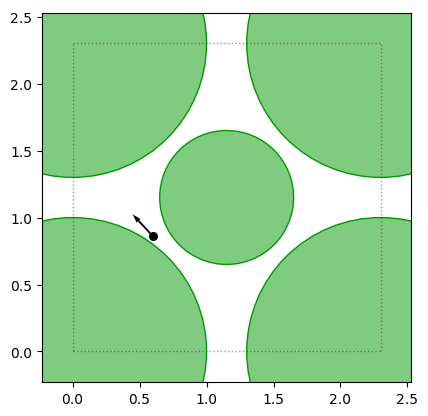

(PyObject <matplotlib.collections.PathCollection object at 0x7feccafc0410>, PyObject <matplotlib.quiver.Quiver object at 0x7feccafc0cd0>)

In [6]:
plot_billiard(bt)
plot_particle(p)

### Dynamics

In [7]:
time = 100.0 
t, pos, vel = fixed_evolution!(p, bt, time);

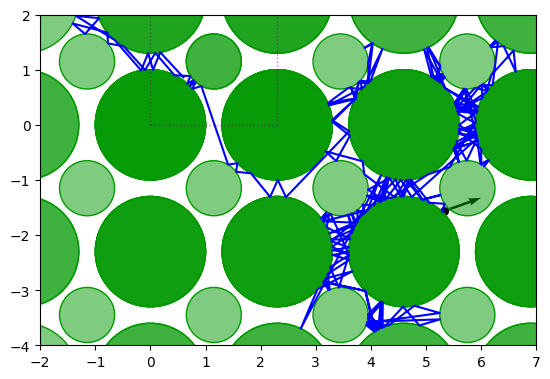

(PyObject <matplotlib.collections.PathCollection object at 0x7fecc77252d0>, PyObject <matplotlib.quiver.Quiver object at 0x7fecc7725c10>)

In [8]:
##Extract x and y from pos
xt = [pos[i][1] for i in 1:length(pos)]
yt = [pos[i][2] for i in 1:length(pos)]

plot_billiard(bt)

plot_billiard(bt, xt, yt)
plot_particle(p)

### Creating a hexagonal unit cell

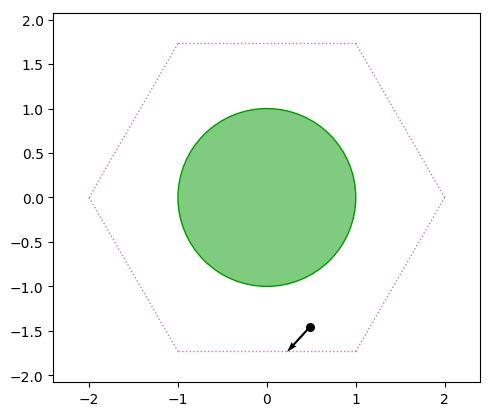

(PyObject <matplotlib.collections.PathCollection object at 0x7fecc762bcd0>, PyObject <matplotlib.quiver.Quiver object at 0x7fecc75b9650>)

In [9]:
l = 2.0 # Length of a side of the hexagon
r = 1.0 # Radius of the disk

bt = billiard_polygon(6, l; setting = "periodic")
d = Disk([0.,0.], r)
push!(bt, d)

p = randominside(bt)

plot_billiard(bt)
plot_particle(p)

1.5900857660478604

In [138]:
function rotation(theta, vec)
    q = similar(vec)
    q[1] = cos(theta)*vec[1] - sin(theta)*vec[2]
    q[2] = sin(theta)*vec[1] + cos(theta)*vec[2]
    q
end

rotation (generic function with 1 method)

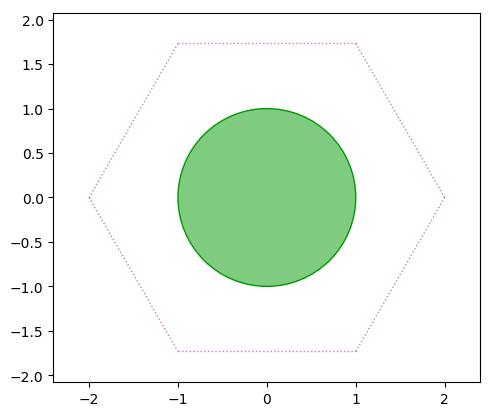

(PyObject <matplotlib.collections.PathCollection object at 0x7fecc0733550>, PyObject <matplotlib.quiver.Quiver object at 0x7fecc0733e90>)

In [206]:
n = 6
R = norm(bt[1].ep - bt[1].sp)
s = R*n
initial_point = rand()*s
f = rand()
ϕ0 = f*π-π/2.


side = ceil(initial_point/12*n)
real_d = initial_point - (side-1.)*R
index = Int(side)

dist = (bt[index].ep - bt[index].sp)
dist /= norm(dist)
xp, yp = bt[index].sp + dist*real_d
#vel = similar(pos)


vel = rotation(ϕ0, bt[index].normal)/norm(bt[index].normal)

current_cell = similar(pos)

k = Particle([xp,yp], vel, current_cell)

plot_billiard(bt)
plot_particle(k)

In [207]:
k

Particle
position: [1.34127, 3.42774e214]
velocity: [-0.559757, -0.828656]

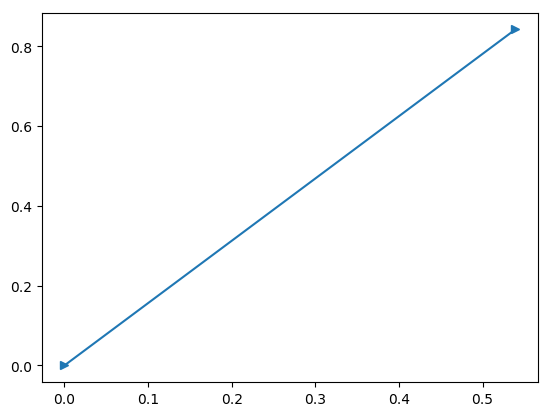

1.5626750265596585

In [173]:
plot([0.,k.vel[1]], [0., k.vel[2]], "->")
k.vel[2]/k.vel[1]

In [98]:
norm(dist)

1.0

### Dynamics

In [26]:
time = 100.0 
t, pos, vel = fixed_evolution!(p, bt, time);

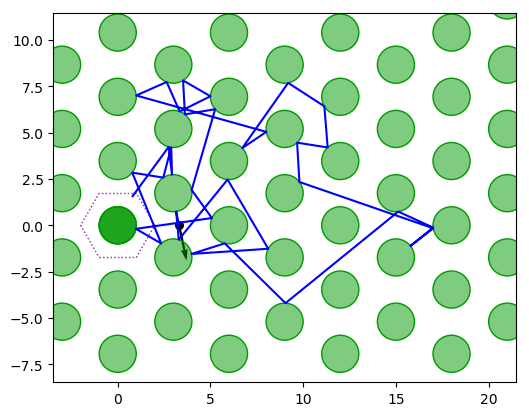

(PyObject <matplotlib.collections.PathCollection object at 0x7f5b4d350a90>, PyObject <matplotlib.quiver.Quiver object at 0x7f5b4d35c410>)

In [27]:
##Extract x and y from pos
xt = [pos[i][1] for i in 1:length(pos)]
yt = [pos[i][2] for i in 1:length(pos)]

plot_billiard(bt)

plot_triangular(bt, xt, yt)  ##Special function for drawing the periodic triangular billiard
plot_particle(p)

## Finite-Time Lyapunov Exponents

I have made the function lyapunovspectrum that returns the Finite Time Lyapunov Spectrum given an initial condition

In [28]:
?lyapunovspectrum

search: lyapunovspectrum



```
lyapunovspectrum(p::AbstractParticle, bt::Vector{Obstacle}, t::Float64)
```

Returns the finite time lyapunov exponents for a given initial condition of the particle `p` . The time `t` is asked to be of type Float64 .


In [29]:
time = 1000.0
p = randominside(bt)
exps = lyapunovspectrum(p, bt, time)

4-element Array{Float64,1}:
  0.64473    
  0.000797578
  0.00032145 
 -0.645217   

## Second part: Testing the code

### Chaotic properties

For the triangular Lorentz gas, the average of the maximum Lyapunov exponent has been reported by [Gaspard et al.](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.51.5332) (see figure 7 displayed below). Here we take a single initial condition and integrate it for a long time to compare it visually with respect to the behavior of the ensemble.

Just let us recall that given a separation($d$) between the centers of two disks in the triangular Lorentz gas, the length of any side of the unit  cell ($l$) is given by
$$
l = \frac{d}{\sqrt{3}}
$$

In [30]:
spaces = 2.0:0.1:4.4 #Distances between disks we want to test

2.0:0.1:4.4

In [31]:
t = 5000.0
radius = 1.0

lyap_time = zeros(spaces) #Array where the exponents will be stored
i = 1
for space in spaces
    bt = billiard_polygon(6, space/(sqrt(3)); setting = "periodic") 
    disc = Disk([0., 0.], radius)
    push!(bt, disc)
    p = randominside(bt)
    exps = lyapunovspectrum(p, bt, t)
    lyap_time[i] = exps[1]
    i+=1
end

In [29]:
using PyPlot

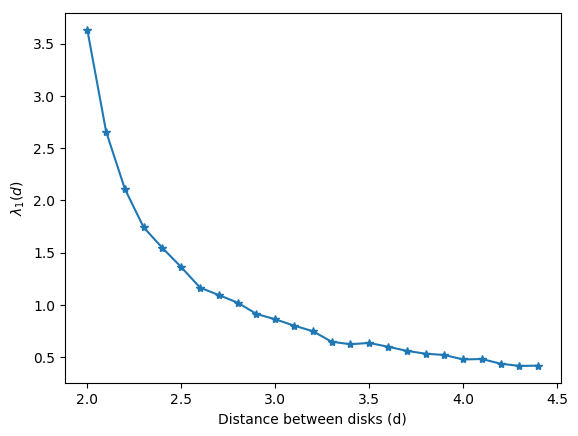

PyObject <matplotlib.text.Text object at 0x7f5b4d2b2d50>

In [32]:
plot(spaces, lyap_time, "*-")
plt[:ylabel](L"$\lambda_1 (d)$")
plt[:xlabel]("Distance between disks (d)")

### Ensemble behavior:

![gaspard](gaspard2.png)

## Statistical properties

For the bounded Lorentz gas, the scaled position (displacement) $\frac{\mathbf{r}(t) - \mathbf{r}(0)}{\sqrt{t}}$ converges in distribution to a normally random variable $\mathbf{z}$ as $t \rightarrow \infty$. That is the central limit theorem for $\Delta \mathbf{r}$. So in two dimensions for large times we expect the distribution of $\mathbf{r}$ to be

$$
\rho(\Delta \mathbf{r}) \, dx \, dy = \rho(\Delta x, \Delta y) \, dx \, dy  = \frac{1}{4 { \pi D t}} \exp \left(- \frac{\Delta x^2 + \Delta y^2}{4 D t} \right) \, dx \, dy
$$

By changing to polar coordinates $(r, \theta)$ we get

$$
\rho(r,\theta) \, dr \, d\theta = \frac{1}{4{\pi D t}} \exp \left( - \frac{r^2}{4 D t} \right) r \, dr \, d \theta
$$

By integrating on $\theta$ 

$$
\rho(r) \, dr = \frac{1}{2Dt}  \exp \left( - \frac{r^2}{4 D t} \right) r \, dr \, .
$$

This is the distribution for the random variable distance ($r \in [0, \infty) $)

In [33]:
function theor_dist(r::Float64, t::Float64, D = 1.0)
    return 1/(2D*t)*exp(-r^2/(4D*t))*r
end
    

theor_dist (generic function with 2 methods)

Let's take the square cell and an small ensemble of $10^4$ trajectories. We will integrate for three different times.

In [34]:
l = 2.3 #Length of a side of the square
bt = billiard_rectangle(l, l; setting = "periodic") #Billiard Table

r1 = 1.0 #Radius of the first kind of disk
r2 = 0.5 #Radius of the second kind of disk

d1 = Disk([0., 0.], r1)
d2 = Disk([l, 0.], r1)
d3 = Disk([0., l], r1)
d4 = Disk([l, l], r1)
dc = Disk([l/2, l/2], r2)

push!(bt, dc, d1,d2,d3,d4)  #Added to the Billiard_table ;

In [35]:
ts = [1000., 2000.]
N = 10^4

distances = zeros(N,length(ts))


for j in 1:length(ts)
    for i in 1:N
        p = randominside(bt)
        pos = displacement!(p, bt, ts[j]) #Function that just returns the initial and the final position
        distances[i, j] = norm(pos[end] -pos[1])
    end
end

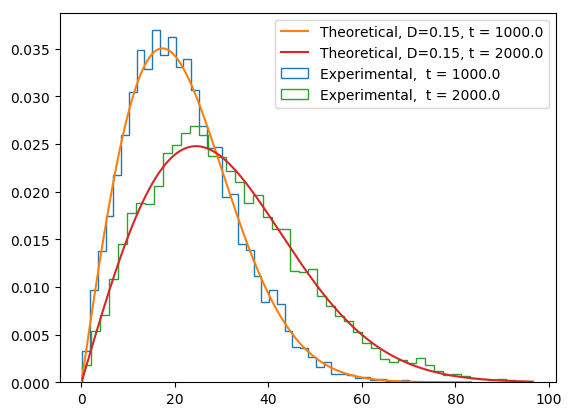

PyObject <matplotlib.legend.Legend object at 0x7f5b48f1fc90>

In [36]:
for i in 1:length(ts)
    plt[:hist](distances[:,i], normed = true, 50, histtype = "step", label = "Experimental,  t = $(ts[i])")
    x = minimum(distances[:,i]):0.1:maximum(distances[:,i])
    y = [theor_dist(k, ts[i], 0.15) for k in x]
    plot(x, y, label = "Theoretical, D=0.15, t = $(ts[i])")
end
plt[:legend]()


Thus at two different times the ensemble behaves as predicted by the equation for $\rho(r)$. This is a strong test that our code passes. We are now ready for choosing another initial distribution